<a href="https://colab.research.google.com/github/NaithaniAR/-Play-Store-App-Review-Analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> INTRODUCTION </b>

# <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

*  #  Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
*  # Explore and analyze the data to discover key factors responsible for app engagement and success. 



 

In [475]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [476]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [477]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/GG/Play Store Data.csv")
df1=pd.read_csv("/content/drive/MyDrive/Datasets/GG/User Reviews.csv")

In [478]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [479]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [480]:
df.shape

(10841, 13)

In [481]:
df.info()    # We observe that we have 13 variables in columns of df , with one glance we observe that Data type of certain variables such as price, installs .. etc need to be converted to numeric type. 
             # After removing duplicate values we are left with a total of 10358 values of 10841

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [482]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Let check the DataFrame for duplicate values 


In [483]:
df.shape # df has 10841 observation before cleaning. 

(10841, 13)

In [484]:
df['App'].shape # there are no null values in the App column 

(10841,)

In [485]:
df[df.duplicated()]  #df has 483 observation before cleaning. 



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [486]:
ddf=df.drop_duplicates(subset=None, keep='last', inplace=False, ignore_index=True)

In [487]:
ddf # we have successfully removed duplicate values and the new shape of 10358 rows × 13 columns is realised. 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Data   Cleaning

### **Rating**

In [550]:
ddf['Rating'].head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

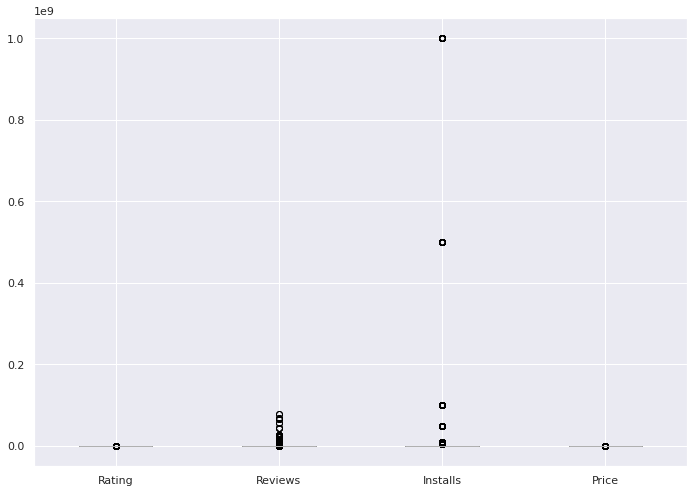

In [551]:
ddf.boxplot() # Since rating can range from 1 to 5 we can observe the presence of an outlier. 

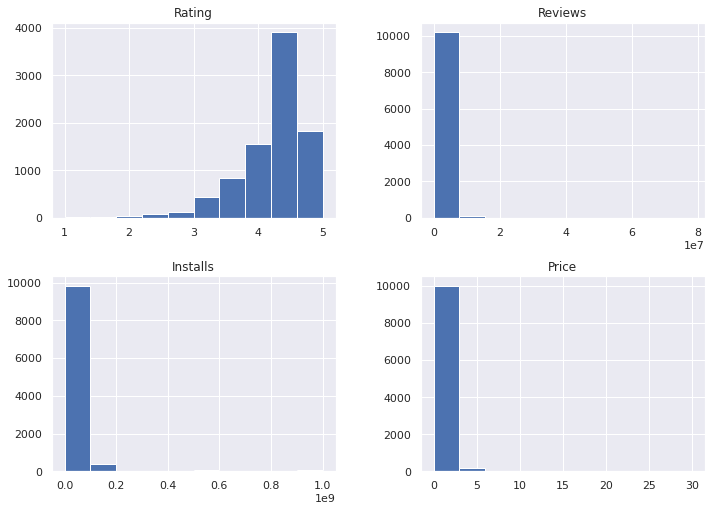

In [552]:
ddf.hist();

In [553]:
ddf[ddf.Rating>5] # We observe the data frame [9989] has shifted values. ['NaN' , 1.9 , 19.0 , '3.0M', '1,000+','Free', 0, 'Everyone'	, 'NaN', 'February 11, 2018' , '1.0.19' , 4.0  ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [554]:
ddf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [555]:
ddf.drop([9989],inplace=True) # dropping the row to maintain logical consistency

In [556]:
ddf.reset_index(drop=True, inplace=True) # resetting index after dropping column 

In [557]:
ddf.iloc[9987:9995]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9987,Motocross Mayhem,GAME,3.8,35171,45M,1000000,Free,0.00,Everyone,Racing,"February 11, 2014",1.2,2.3 and up
9988,Funny Jokes,FAMILY,3.9,2505,2.9M,100000,Free,0.00,Mature 17+,Entertainment,"June 18, 2018",1.2,4.1 and up
9989,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21M,50000000,Free,0.00,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up
9990,Motocross Fun Simulator,FAMILY,3.8,22570,35M,1000000,Free,0.00,Everyone,Simulation,"January 9, 2017",1.2,2.3.3 and up
9991,Dino Defends king 3 – Dinosaur T rex Hunter Games,GAME,3.6,182,41M,50000,Free,0.00,Teen,Adventure,"March 1, 2018",2.1,4.1 and up
9992,Fast Notes FJ,PRODUCTIVITY,4.2,12,2.2M,500,Free,0.00,Everyone,Productivity,"August 12, 2014",8.0.0,2.2 and up
9993,FJ Toolkit,TOOLS,NaN,1,2.5M,100,Paid,1.49,Everyone,Tools,"December 21, 2015",14,4.0 and up
9994,Block Gun 3D: Haunted Hollow,GAME,3.8,16282,35M,1000000,Free,0.00,Teen,Action,"October 9, 2017",1.1.4,2.3 and up


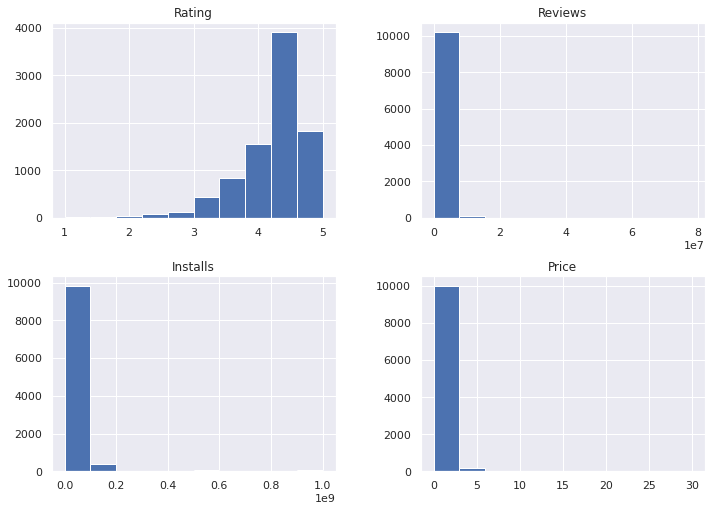

In [558]:
ddf.hist(); # After treating the outlier we observe the rating values range from 1 to 5 

In [559]:
ddf['Rating'].isnull().sum() # we observe there are 1465 null values in ratings column 

1451

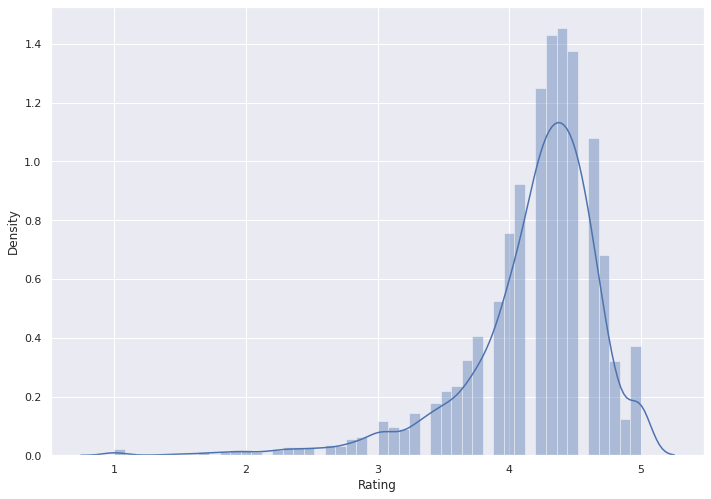

In [560]:
sns.set(rc={'figure.figsize':(11.7,8.25)}) #Plot Before we fill nan values 
ax = sns.distplot(ddf['Rating'])

In [561]:
impute_mode=ddf['Rating'].mode()                     # You may note that the data is skewed it is not recommended to use the mean for replacing the missing values
ddf['Rating']=ddf['Rating'].fillna(impute_mode)      # Using mean values for replacing missing values may not create a great model and hence gets ruled out.

As the distribution is skewed we will impute through mode 
When the data is skewed, it is good to consider using the mode value for replacing the missing values

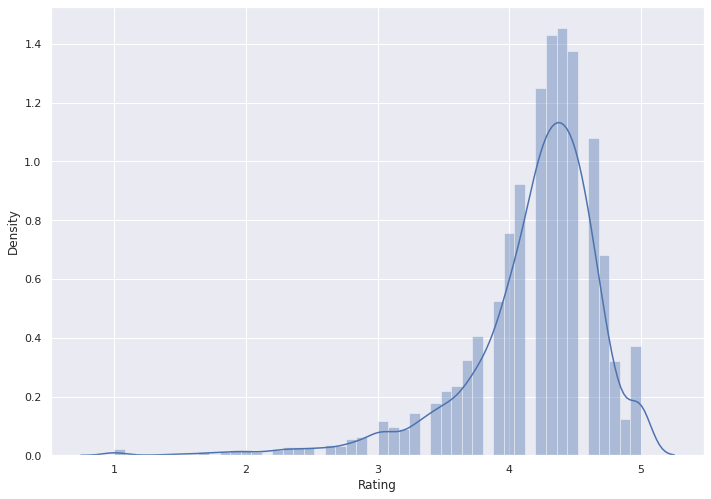

In [562]:
sns.set(rc={'figure.figsize':(11.7,8.25)}) #Plot after we fill NaN values, we can observe little to no devation from the original plot. 
ax = sns.distplot(ddf['Rating'])

### **Install & Price**

In [563]:
ddf[('Installs')].unique() # we observe that there are unwanted characters in the dataset and the data type of the data is of object type. 

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [564]:
ddf[('Price')].unique() # we observe that there are unwanted characters in the dataset and the data type of the data is of object type. 

array([ 0.  ,  4.99,  3.99,  6.99,  1.49,  2.99,  7.99,  5.99,  3.49,
        1.99,  9.99,  7.49,  0.99,  1.  ,  2.49, 10.99,  1.5 , 14.99,
       15.99,  9.  , 24.99, 10.  , 16.99, 11.99, 29.99,  5.49, 12.99,
       19.99,  3.95,  4.49,  1.7 ,  8.99,  2.  ,  3.88, 25.99, 17.99,
        3.02,  1.76,  4.84,  4.77,  1.61,  2.5 ,  1.59,  6.49,  1.29,
        5.  , 13.99, 18.99, 19.9 ,  8.49,  1.75, 14.  ,  4.85,  3.08,
        2.59,  4.8 ,  1.96, 19.4 ,  3.9 ,  4.59, 15.46,  3.04,  4.29,
        2.6 ,  3.28,  4.6 , 28.99,  2.95,  2.9 ,  1.97,  2.56,  3.61,
        1.26,  1.2 ,  1.04])

In [565]:
chars_to_remove = ['+', ',' , '$' ]
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        ddf[col] = ddf[col].astype(str).str.replace(char, '')
   

Price

In [566]:
 # Convert col to numeric
ddf['Price'] = pd.to_numeric(ddf['Price']) 

In [567]:
ddf[('Price')].unique()

array([ 0.  ,  4.99,  3.99,  6.99,  1.49,  2.99,  7.99,  5.99,  3.49,
        1.99,  9.99,  7.49,  0.99,  1.  ,  2.49, 10.99,  1.5 , 14.99,
       15.99,  9.  , 24.99, 10.  , 16.99, 11.99, 29.99,  5.49, 12.99,
       19.99,  3.95,  4.49,  1.7 ,  8.99,  2.  ,  3.88, 25.99, 17.99,
        3.02,  1.76,  4.84,  4.77,  1.61,  2.5 ,  1.59,  6.49,  1.29,
        5.  , 13.99, 18.99, 19.9 ,  8.49,  1.75, 14.  ,  4.85,  3.08,
        2.59,  4.8 ,  1.96, 19.4 ,  3.9 ,  4.59, 15.46,  3.04,  4.29,
        2.6 ,  3.28,  4.6 , 28.99,  2.95,  2.9 ,  1.97,  2.56,  3.61,
        1.26,  1.2 ,  1.04])

In [568]:
ddf['Price'].isnull().sum()# checking for null values 

0

In [569]:
ddf[('Price')].describe() # We can observe that the data type is changed to float type 

count    10316.000000
mean         0.296949
std          1.610438
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.990000
Name: Price, dtype: float64

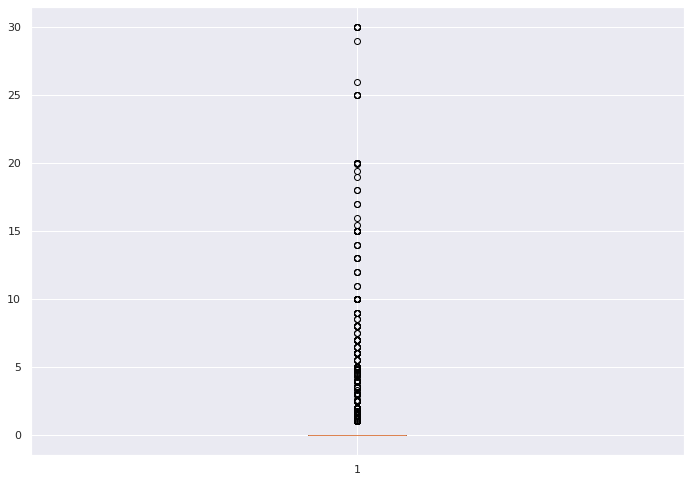

In [570]:
#Create a box plot for the price column
plt.boxplot(ddf.Price)
plt.show()

In [571]:
ddf.shape

(10316, 13)

In [572]:
print(ddf[ddf.Price>100].shape)  # We observe that there are 20 apps which are outliers for price app 
Expen= ddf[ddf.Price>100]
Expen

(0, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [573]:
ddf=ddf[ddf.Price<=100]

In [574]:
ddf.shape #Shape of the Dataset changes from (10357, 13)

(10316, 13)

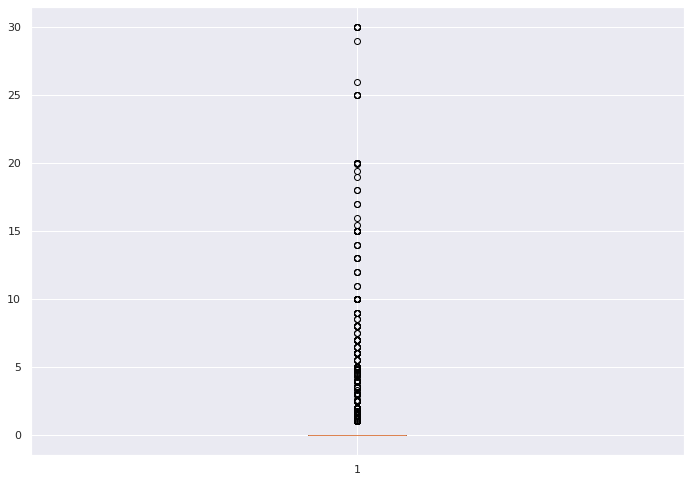

In [575]:
#Create a box plot for the price column
plt.boxplot(ddf.Price)
plt.show()

In [576]:
ddf[ddf.Price != 0].sort_values(by=['Price'], ascending=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5270,F05WatchFace for Android Wear,PRODUCTIVITY,3.9,127,5.9M,1000,Paid,0.99,Everyone,Productivity,"December 24, 2017",7.0.1,4.3 and up
4771,AJ Turquoise Dark Icon Pack,PERSONALIZATION,NaN,0,32M,10,Paid,0.99,Everyone,Personalization,"May 1, 2018",1.1,4.1 and up
9198,EP Coding,MEDICAL,NaN,0,2.0M,50,Paid,0.99,Everyone,Medical,"October 5, 2017",1.6,4.0 and up
4769,AJ Blue Icon Pack,PERSONALIZATION,5.0,4,31M,50,Paid,0.99,Everyone,Personalization,"April 27, 2018",1.1,4.1 and up
4766,AJ Gray Dark Icon Pack,PERSONALIZATION,5.0,2,35M,10,Paid,0.99,Everyone,Personalization,"April 29, 2018",1.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,AP Art History Flashcards,FAMILY,5.0,1,96M,10,Paid,29.99,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up
2077,EMT PASS,MEDICAL,3.4,51,2.4M,1000,Paid,29.99,Everyone,Medical,"October 22, 2014",2.0.2,4.0 and up
2094,PTA Content Master,MEDICAL,4.2,64,41M,1000,Paid,29.99,Everyone,Medical,"December 22, 2015",2.1,2.2 and up
2629,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25M,50000,Paid,29.99,Everyone,Sports,"July 11, 2018",4.18.0,4.1 and up


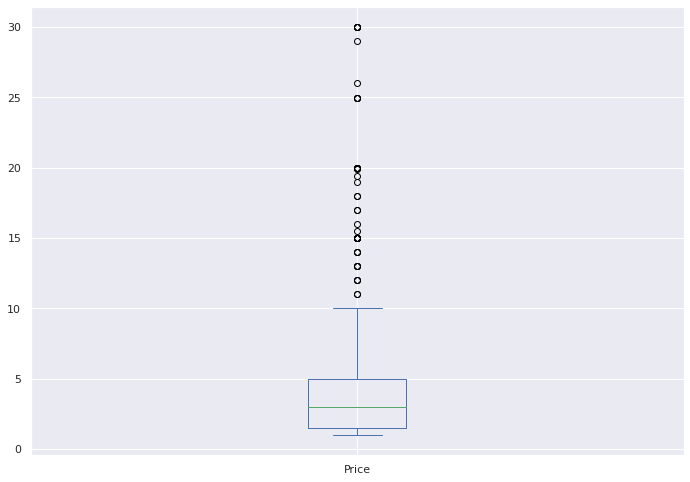

In [577]:
ddf[ddf.Price>0].Price.plot.box() # Box plot of Paid apps
plt.show()


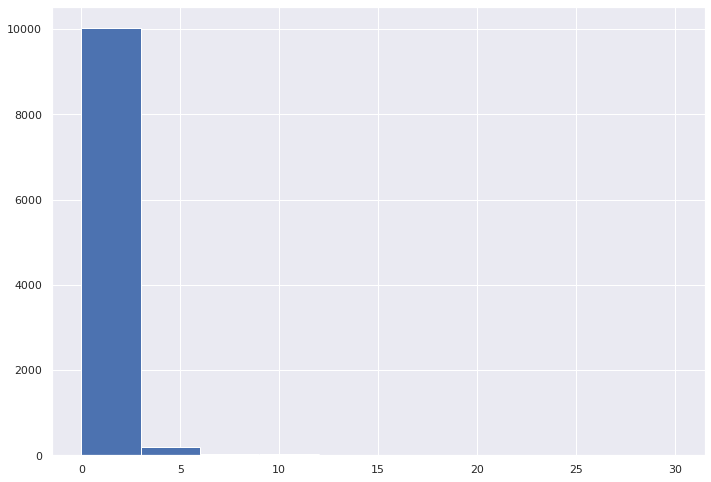

In [578]:
plt.hist(ddf.Price)
plt.show()

In [579]:
ddf[ddf.Price > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [580]:
print(ddf[ddf.Price > 30].shape)
ddf.shape

(0, 13)


(10316, 13)

In [581]:
ddf=ddf[ddf.Price<30]

In [582]:
ddf.shape ## Shape of the Dataset changes from (10357, 13)

(10316, 13)

In [583]:
ddf[(ddf.Type == "Free") & (ddf.Price > 0)] # Checking data for logical inconsistency, there are none present 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Installs

In [620]:
ddf.sort_values(by='Installs')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4979,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0,Paid,1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up
3973,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0,Paid,1.49,Everyone,Personalization,"July 11, 2018",1.1,4.2 and up
6919,Pekalongan CJ,SOCIAL,NaN,0,5.9M,0,Free,0.00,Teen,Social,"July 21, 2018",0.0.1,4.4 and up
8098,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1M,0,Free,0.00,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up
8820,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56M,0,Paid,3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0.00,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
3610,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613,Varies with device,1000000000,Free,0.00,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
3002,Google Drive,PRODUCTIVITY,4.4,2731171,Varies with device,1000000000,Free,0.00,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
1436,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0.00,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


In [621]:
 # Convert col to numeric
 ddf['Installs'] = pd.to_numeric(ddf['Installs']) 

In [622]:
ddf[('Installs')].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [623]:
ddf[('Installs')].describe() # We can observe that the data type is changed to float type 

count    1.031600e+04
mean     1.421304e+07
std      8.039400e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [624]:
ddf['Installs'].isnull().sum() # checking for null values


0

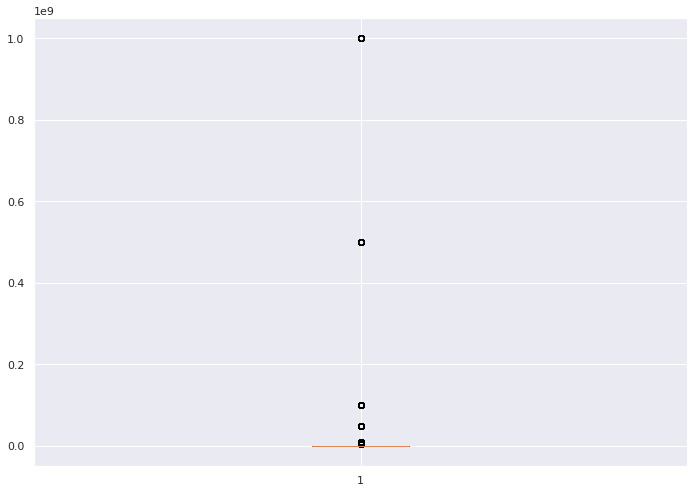

In [625]:
#Create a box plot for the Installs column
plt.boxplot(ddf.Installs)
plt.show()

In [618]:
ddf[ddf.Installs.sort_values]

TypeError: ignored

In [590]:
ddf.shape

(10316, 13)

### **Reviews**

In [591]:
ddf['Reviews'].describe() # we observe that reviews data type is object, for convinience during EDA we will convert it to int data type. 

count    1.031600e+04
mean     4.075029e+05
std      2.702012e+06
min      0.000000e+00
25%      3.300000e+01
50%      1.728000e+03
75%      4.707425e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [592]:
ddf = ddf.astype({'Reviews':'int'})

In [593]:
ddf['Reviews'].describe()

count    1.031600e+04
mean     4.075029e+05
std      2.702012e+06
min      0.000000e+00
25%      3.300000e+01
50%      1.728000e+03
75%      4.707425e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [594]:
ddf['Reviews'].isnull().sum() # there are no null values in Reviews 

0

In [595]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [596]:
print(ddf[(ddf.Reviews > ddf.Installs)].shape);     # We observe logical inconsistency in our data as the number reviews cannot be greater than number of installs. 
print('\n')
print(ddf.shape);
print('\n')
ddf[(ddf.Reviews > ddf.Installs)]



(0, 13)


(10316, 13)




,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [597]:
ddf = ddf[ddf.Reviews <= ddf.Installs]         #observation with logical inconsistency have been removed. 
print(ddf.shape) 

(10316, 13)


### **Current Var**

In [598]:
ddf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [599]:
ddf[ddf['Current Ver'].isnull()]  # checking for null values, we observe 7 null values 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [600]:
#Check the most common value in the Android version column
ddf["Current Ver"].value_counts() 

Varies with device    1309
1.0                    787
1.1                    260
1.2                    176
2.0                    148
                      ... 
9.14.1                   1
1.7.2992                 1
0.4.4                    1
4.8.6                    1
2.0.148.0                1
Name: Current Ver, Length: 2827, dtype: int64

In [601]:
ddf["Current Ver"].mode()  #Current Ver

0    Varies with device
dtype: object

In [602]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10316 entries, 0 to 10315
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10316 non-null  object 
 1   Category        10316 non-null  object 
 2   Rating          8865 non-null   float64
 3   Reviews         10316 non-null  int64  
 4   Size            10316 non-null  object 
 5   Installs        10316 non-null  int64  
 6   Type            10315 non-null  object 
 7   Price           10316 non-null  float64
 8   Content Rating  10316 non-null  object 
 9   Genres          10316 non-null  object 
 10  Last Updated    10316 non-null  object 
 11  Current Ver     10316 non-null  object 
 12  Android Ver     10316 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [603]:
ddf["Current Ver"] = ddf["Current Ver"].fillna(ddf["Current Ver"].mode()[0])

In [604]:
ddf["Current Ver"].value_counts() 

Varies with device    1309
1.0                    787
1.1                    260
1.2                    176
2.0                    148
                      ... 
9.14.1                   1
1.7.2992                 1
0.4.4                    1
4.8.6                    1
2.0.148.0                1
Name: Current Ver, Length: 2827, dtype: int64

### **Android Var**

In [605]:
ddf[ddf["Android Ver"].isnull()]  # checking for null values 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [606]:
#Check the most common value in the Android version column
ddf["Android Ver"].value_counts() 

4.1 and up            2372
4.0.3 and up          1442
4.0 and up            1331
Varies with device    1220
4.4 and up             889
2.3 and up             638
5.0 and up             546
4.2 and up             385
2.3.3 and up           279
2.2 and up             239
3.0 and up             236
4.3 and up             234
2.1 and up             133
1.6 and up             115
6.0 and up              58
7.0 and up              41
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [607]:
ddf["Android Ver"].mode()

0    4.1 and up
dtype: object

In [608]:
#Fill up the nulls in the Android Version column with the above value
ddf["Android Ver"] = ddf["Android Ver"].fillna(ddf["Android Ver"].mode()[0])

In [609]:
#Check the nulls in the Android version column again to cross-verify
print(ddf[ddf["Android Ver"].isnull()])
print ('\n')

ddf["Android Ver"].value_counts() 

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []




4.1 and up            2372
4.0.3 and up          1442
4.0 and up            1331
Varies with device    1220
4.4 and up             889
2.3 and up             638
5.0 and up             546
4.2 and up             385
2.3.3 and up           279
2.2 and up             239
3.0 and up             236
4.3 and up             234
2.1 and up             133
1.6 and up             115
6.0 and up              58
7.0 and up              41
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [610]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10316 entries, 0 to 10315
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10316 non-null  object 
 1   Category        10316 non-null  object 
 2   Rating          8865 non-null   float64
 3   Reviews         10316 non-null  int64  
 4   Size            10316 non-null  object 
 5   Installs        10316 non-null  int64  
 6   Type            10315 non-null  object 
 7   Price           10316 non-null  float64
 8   Content Rating  10316 non-null  object 
 9   Genres          10316 non-null  object 
 10  Last Updated    10316 non-null  object 
 11  Current Ver     10316 non-null  object 
 12  Android Ver     10316 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


### **Size**

In [611]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10316 entries, 0 to 10315
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10316 non-null  object 
 1   Category        10316 non-null  object 
 2   Rating          8865 non-null   float64
 3   Reviews         10316 non-null  int64  
 4   Size            10316 non-null  object 
 5   Installs        10316 non-null  int64  
 6   Type            10315 non-null  object 
 7   Price           10316 non-null  float64
 8   Content Rating  10316 non-null  object 
 9   Genres          10316 non-null  object 
 10  Last Updated    10316 non-null  object 
 11  Current Ver     10316 non-null  object 
 12  Android Ver     10316 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


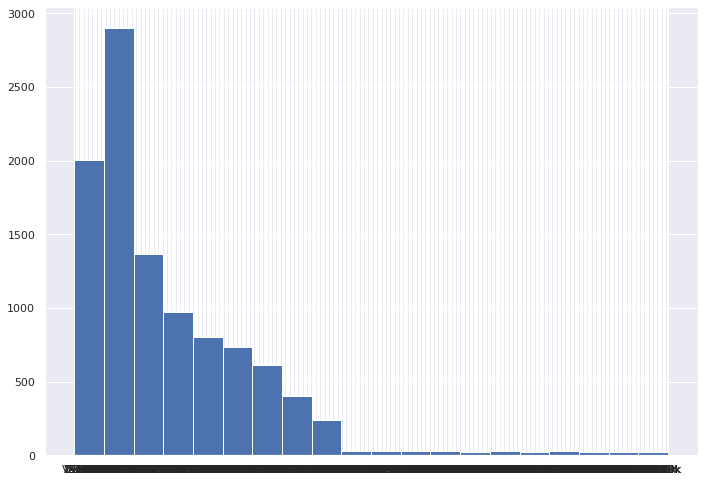

In [626]:
#Plot a histogram for Size as well.
plt.hist(ddf.Size, bins=20)
plt.show()

# Questions To Solve
1.   What is the most expensive app on the store.
2.   Which Genre has more apps.
3.   What is the average size of the free apps & paid apps
4.   What is the 5 top rated apps.
5.   How many apps that has more than 50K reviews.
6.   What is the average price of the apps for each genre with each installs numbers. 
7.   How many apps have rating > 4.7 and what is thier avg price.
8.   How much google earned from the 5,000,000+ installed apps
9.   What is the max and min size for free and paid apps.
10.  is there a correlation between rating, Reviews, Size with the price of the app
11.  How many apps for each type for each content reading
12.  How many apps that can work on android version 4.2
13.  
14.  

 

## high category of app

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Category', data=ddf)



## free app vs paid app

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Type', data=ddf)

In [ ]:
ddf.columns

In [ ]:
ddf.head()

##highest installed app

In [ ]:
installed_app = ddf[ddf['Installs']== 1000000000 ]
installed_app[['App','Installs']].head(10)

## app with zero installment 

In [ ]:
installed_app = ddf[ddf['Installs']==0]
installed_app[['App','Installs','Price']]

In [ ]:
installed_app2 = ddf[ddf['Price']==399]
installed_app[['App','Price']]

In [ ]:
ddf['Price'].sort_values(ascending=True).tail(20)

In [ ]:
ddf['Price'].describe()

In [ ]:
ddf['Installs'].max()

In [ ]:
ddf['Installs'].min()

In [ ]:
ddf['Installs'].mean()